In [ ]:
%pip install seaborn

In [ ]:
%pip install openpyxl       

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
import pandas as pd
import concurrent.futures
import numpy as np
import math
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, ConfusionMatrixDisplay, auc, roc_auc_score, f1_score, confusion_matrix
from sklearn import datasets
from statistics import mean
import includes.model as mod
import pandas as pd
from joblib import dump, load
from includes.config import Config;
import includes.model_functions as mf
import time
from itertools import combinations
import random
from graphviz import Digraph
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from datetime import datetime 
import os
import argparse
from itertools import count
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [203]:
# Get the data 
# Competitor
all_data_names = [
# 'letter',
'mfeat-factors',
'mfeat-fourier',
'mfeat-karhunen',
'mfeat-morphological',
'mfeat-pixel',
'mfeat-zernike',
'optdigits',
'page-blocks',
'pendigits',
'satimage',
'segment',
'Beans',
'car-evaluation'
]
all_model_names = [
    'Name',
    'KNN',	
    'LDA',	
    'Random Forest',	
    'xgboost OVR score',
    'xgboost OVO score',
    'SVM OVR',
    'SVM OVO',
    'MLP Classifier',
    'Multinomial score'
]
df = pd.read_excel(r"C:\Users\maxdi\OneDrive\Documents\uni_honours_docs\final_results.xlsx", sheet_name="Competitor Model")
df
df = df.loc[df['Name'].isin(all_data_names)][all_model_names]

In [24]:
# Compare to other paper
# Competitor
all_data_names = [
# 'letter',
'mfeat-factors',
'mfeat-fourier',
'mfeat-karhunen',
'mfeat-morphological',
'mfeat-pixel',
'mfeat-zernike',
'optdigits',
'page-blocks',
'pendigits',
'satimage',
'segment',
# 'Beans',
# 'car-evaluation'
]
all_model_names = [
    'Name',
	'My knn score',
    'My Random Forest',
    'My xgboost',
    'My SVM Model',
    'My Logistic Regression',
    'My Lasso Logistic Regression',
    'Best ND Paper'
]
df = pd.read_excel(r"C:\Users\maxdi\OneDrive\Documents\uni_honours_docs\final_results.xlsx", sheet_name="My Models")
df
df = df.loc[df['Name'].isin(all_data_names)][all_model_names]

In [204]:

all_my_model_names = [
	'My knn score',
    'My Random Forest',
    'My xgboost',
    'My SVM Model',
    'My Logistic Regression',
    'My Lasso Logistic Regression'
]
df_mine = pd.read_excel(r"C:\Users\maxdi\OneDrive\Documents\uni_honours_docs\final_results.xlsx", sheet_name="My Models")
df_mine = df_mine.loc[df_mine['Name'].isin(all_data_names)][['Name'] + all_my_model_names]
df_mine = df_mine.fillna(0)



In [26]:
df_mine["Stepwise ND model"] = df_mine[all_my_model_names].max(axis=1)
df = df.merge(df_mine[['Name', 'Stepwise ND model']], how="inner", on="Name")

In [ ]:
df = df_mine

In [27]:
df = df[['Name', 'Stepwise ND model', 'Best ND Paper']]

In [ ]:
df = df.merge(df_mine, how="inner", on="Name")
svm_models = [
    'Name',
    'My SVM Model',
    'SVM OVR',
    'SVM OVO',
]
df_svm = df[svm_models]
df = df_svm

In [ ]:
df = df.merge(df_mine, how="inner", on="Name")
xg_models = [
    'Name',
    'My xgboost',
    'xgboost OVR score',
    'xgboost OVO score',
]

df_xg = df[xg_models]
df = df_xg

In [51]:
df = df.merge(df_mine, how="inner", on="Name")
rf_models = [
    'Name',
    'My Random Forest',
    'Random Forest',
]

df_rf = df[rf_models]
df = df_rf

In [205]:
df = df.merge(df_mine, how="inner", on="Name")
knn_models = [
    'Name',
    'My knn score',
    'KNN',
]

df_knn = df[knn_models]
df = df_knn

In [31]:
df = df.merge(df_mine, how="inner", on="Name")
lr_models = [
    'Name',
    'My Logistic Regression',
    'My Lasso Logistic Regression',
    'Multinomial score'
]

df_lr = df[lr_models]
df = df_lr

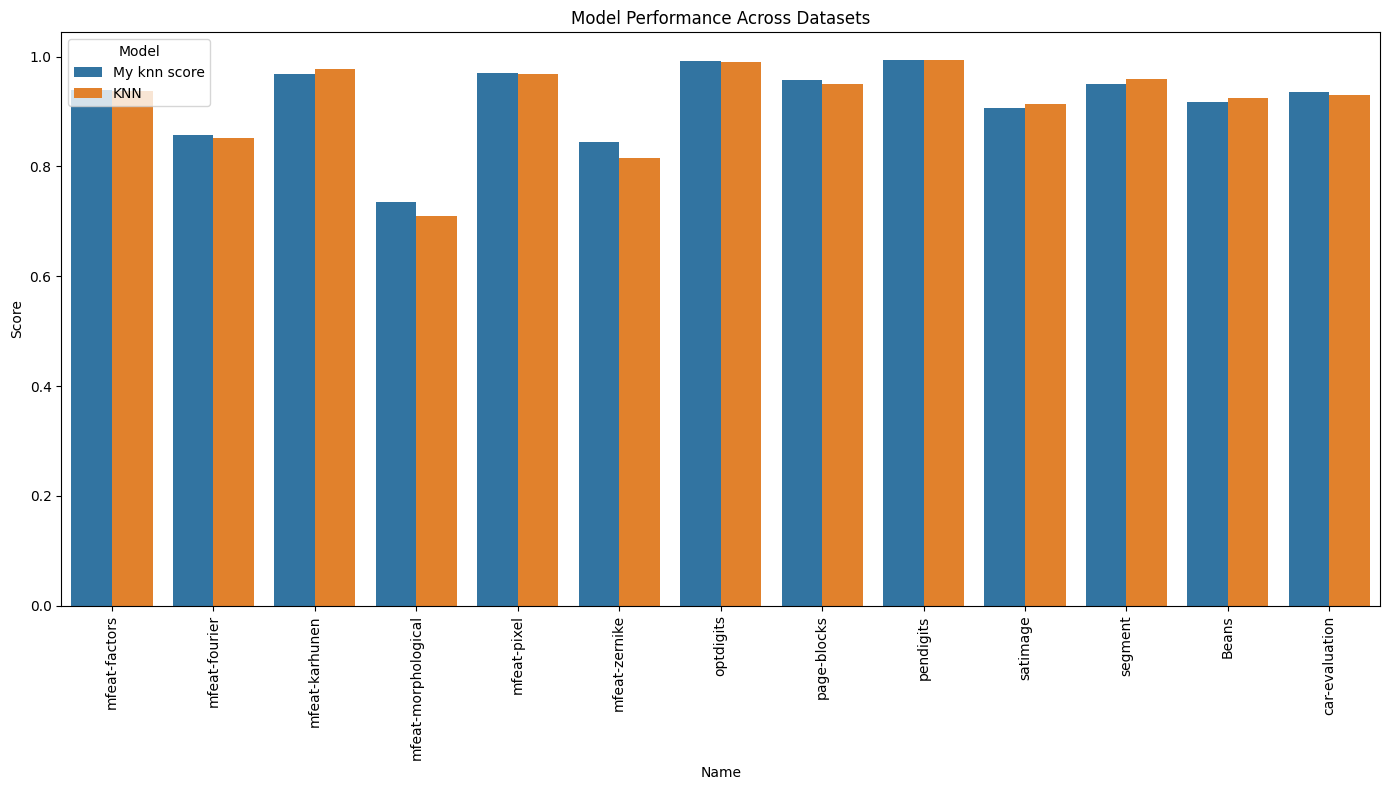

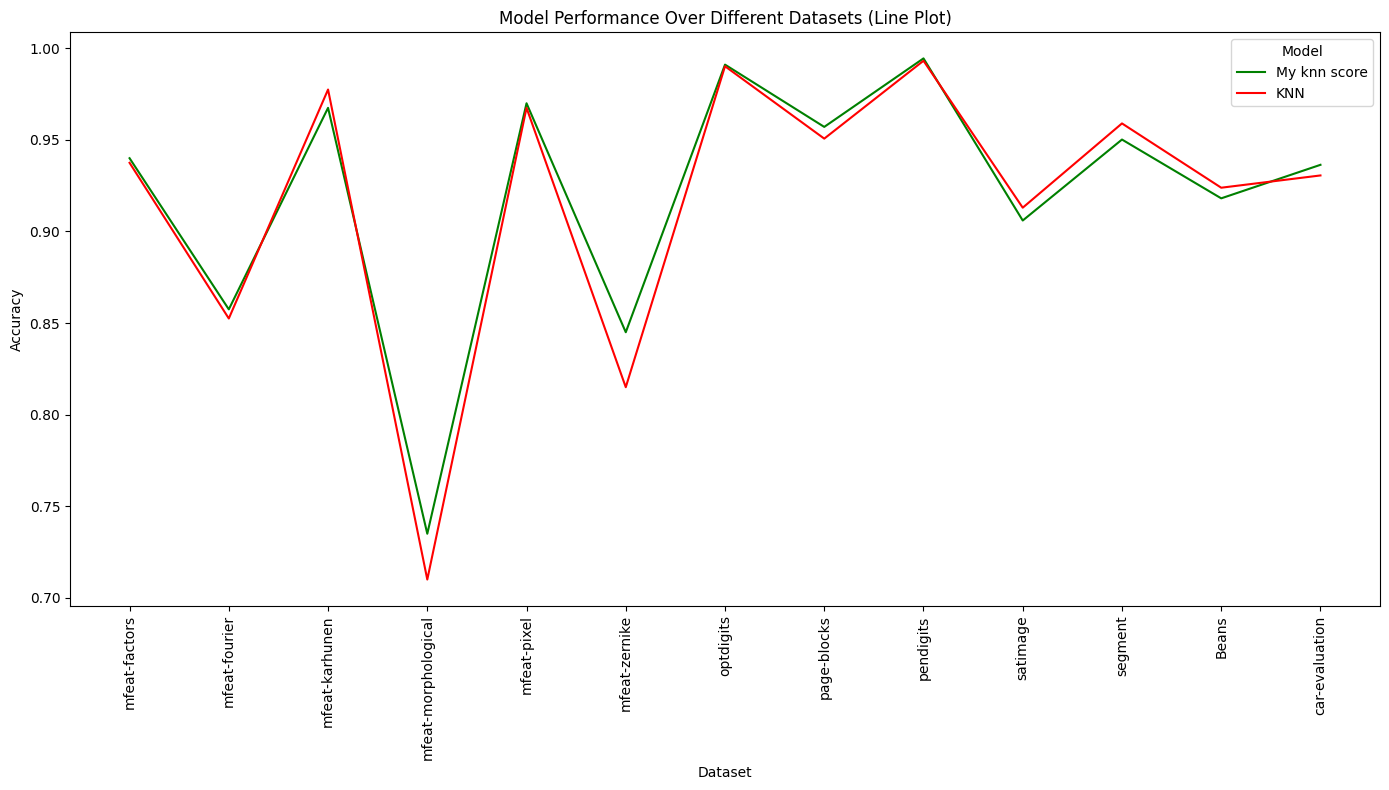

In [207]:
# Creating the dataset
# data = {
#     "Name": ["letter", "mfeat-factors", "mfeat-fourier", "mfeat-karhunen", "mfeat-morphological", "mfeat-pixel", "mfeat-zernike", 
#              "optdigits", "page-blocks", "pendigits", "satimage", "segment", "Beans", "car-evaluation"],
#     "KNN": [0.9603, 0.9375, 0.8525, 0.9775, 0.505, 0.9675, 0.815, 0.9902, 0.9507, 0.9932, 0.913, 0.959, 0.7341, 0.9306],
#     "LDA": [0.70675, 0.98, 0.78, 0.9475, 0.7225, 0.955, 0.8325, 0.9555, 0.9461, 0.8672, 0.8329, 0.9048, 0.9045, 0.8988],
#     "Random Forest": [0.9685, 0.96, 0.82, 0.955, 0.735, 0.97, 0.7725, 0.9867, 0.9744, 0.9905, 0.9122, 0.9654, 0.9203, 0.9595],
#     "xgboost OVR score": [0.9685, 0.9725, 0.865, 0.96, 0.7075, 0.9625, 0.8025, 0.976, 0.9735, 0.9886, 0.9184, 0.987, 0.9332, 0.9798],
#     "xgboost OVO score": [0.94875, 0.9675, 0.8525, 0.94, 0.7025, 0.9525, 0.745, 0.9689, 0.9772, 0.9868, 0.9246, 0.9848, 0.928, 0.9827],
#     "SVM OVR": [0.93625, 0.97, 0.8325, 0.9675, 0.7275, 0.9725, 0.825, 0.9858, 0.96347, 0.99181, 0.885, 0.9221, 0.9299, 0.94798],
#     "SVM OVO": [0.9625, 0.9625, 0.8525, 0.9775, 0.7475, 0.9675, 0.8175, 0.98843, 0.96256, 0.99454, 0.89977, 0.9416, 0.9306, 0.9769],
#     "MLP Classifier": [0.95825, 0.9675, 0.8425, 0.9625, 0.745, 0.9675, 0.8225, 0.9858, 0.9689, 0.9932, 0.9052, 0.9567, 0.9247, 0.9913],
#     "Multinomial score": [0.78, 0.98, 0.82, 0.95, 0.725, 0.957, 0.8125, 0.96263, 0.95616, 0.94, 0.80109, 0.94, 0.86412, 0.92197]
# }

# # Creating a DataFrame
# df = pd.DataFrame(data)

# # Plot 1: Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.set_index('Name').T, cmap="Blues", annot=True)
# plt.title("Model Performance Heatmap")
# plt.tight_layout()
# plt.show()

# Plot 2: Bar Plot
df_melt = df.melt(id_vars=["Name"], var_name="Model", value_name="Score")
plt.figure(figsize=(14, 8))
sns.barplot(x="Name", y="Score", hue="Model", data=df_melt)
plt.title("Model Performance Across Datasets")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 3: Line Plot

plt.figure(figsize=(14, 8))
sns.lineplot(x="Dataset", y="Accuracy", hue="Model", 
             data=pd.melt(df, ['Name']).rename({'Name':'Dataset','variable':'Model', 'value':'Accuracy'}, axis=1), 
             palette=palette
             )
plt.title("Model Performance Over Different Datasets (Line Plot)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [53]:
palette = {
    'My Random Forest': 'green',  # Assign green to 'Model1'
    'Random Forest': 'red'     # Assign red to 'Model2'
    # You can add more models and assign colors if needed
}

In [206]:
palette = {
    'My knn score': 'green',  # Assign green to 'Model1'
    'KNN': 'red'     # Assign red to 'Model2'
    # You can add more models and assign colors if needed
}

C:\Users\maxdi\AppData\Local\Temp\ipykernel_28568\1286969617.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_model_count.values, y=best_model_count.index, palette="rocket")


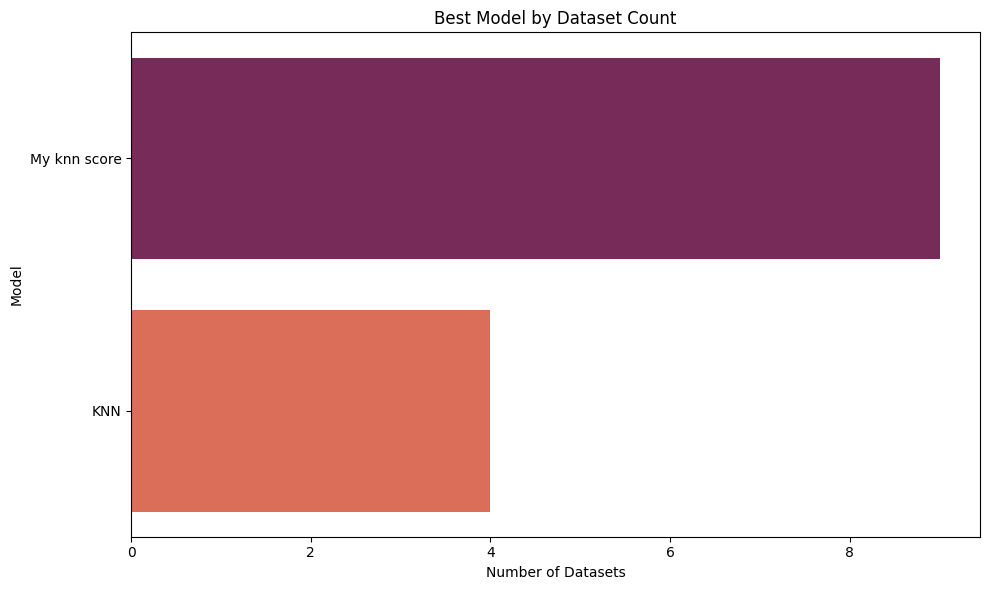

    My knn score  KNN
0            2.0  1.0
1            2.0  1.0
2            1.0  2.0
3            2.0  1.0
4            2.0  1.0
5            2.0  1.0
6            2.0  1.0
7            2.0  1.0
8            2.0  1.0
9            1.0  2.0
10           1.0  2.0
11           1.0  2.0
12           2.0  1.0


C:\Users\maxdi\AppData\Local\Temp\ipykernel_28568\1286969617.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ranking.values, y=average_ranking.index, palette="rocket")


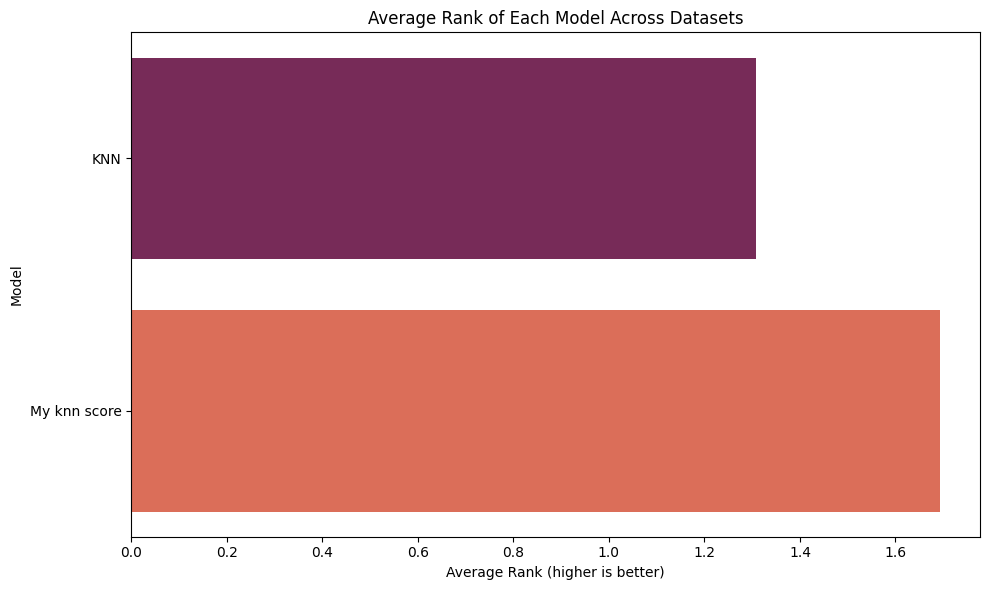

In [208]:
# Ranking models based on their average performance across all datasets
model_columns = df.columns[1:]  # Exclude the "Name" column
model_rankings = df[model_columns].mean().sort_values(ascending=False)
model_rankings = df[model_columns].rank(axis=1, method='average', ascending=True)

# Plotting the rankings
# plt.figure(figsize=(10, 6))
# sns.barplot(x=model_rankings.values, y=model_rankings.index, palette="viridis")
# plt.title("Average Model Performance Ranking")
# plt.xlabel("Average Score")
# plt.ylabel("Model")
# plt.tight_layout()
# plt.show()

# Showing the best model for each dataset
best_models_per_dataset = df.set_index("Name").idxmax(axis=1)
best_models_per_dataset = df.set_index("Name").apply(lambda row: row.index[row == row.max()][0], axis=1)

# Count the number of times each model was the best across datasets
best_model_count = best_models_per_dataset.value_counts()
best_model_count = df.set_index("Name").apply(lambda row: row.index[row == row.max()].tolist(), axis=1).explode().value_counts()


# Plotting the best model counts
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model_count.values, y=best_model_count.index, palette="rocket")
plt.title("Best Model by Dataset Count")
plt.xlabel("Number of Datasets")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Calculating the rank for each model on every dataset
rankings = df[model_columns].rank(axis=1, ascending=True)
print(rankings)

# Calculating the average rank for each model
average_ranking = rankings.mean().sort_values()

# Plotting the average rank of each model
plt.figure(figsize=(10, 6))
# plt.gca().invert_xaxis()
sns.barplot(x=average_ranking.values, y=average_ranking.index, palette="rocket")
plt.title("Average Rank of Each Model Across Datasets")
plt.xlabel("Average Rank (higher is better)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


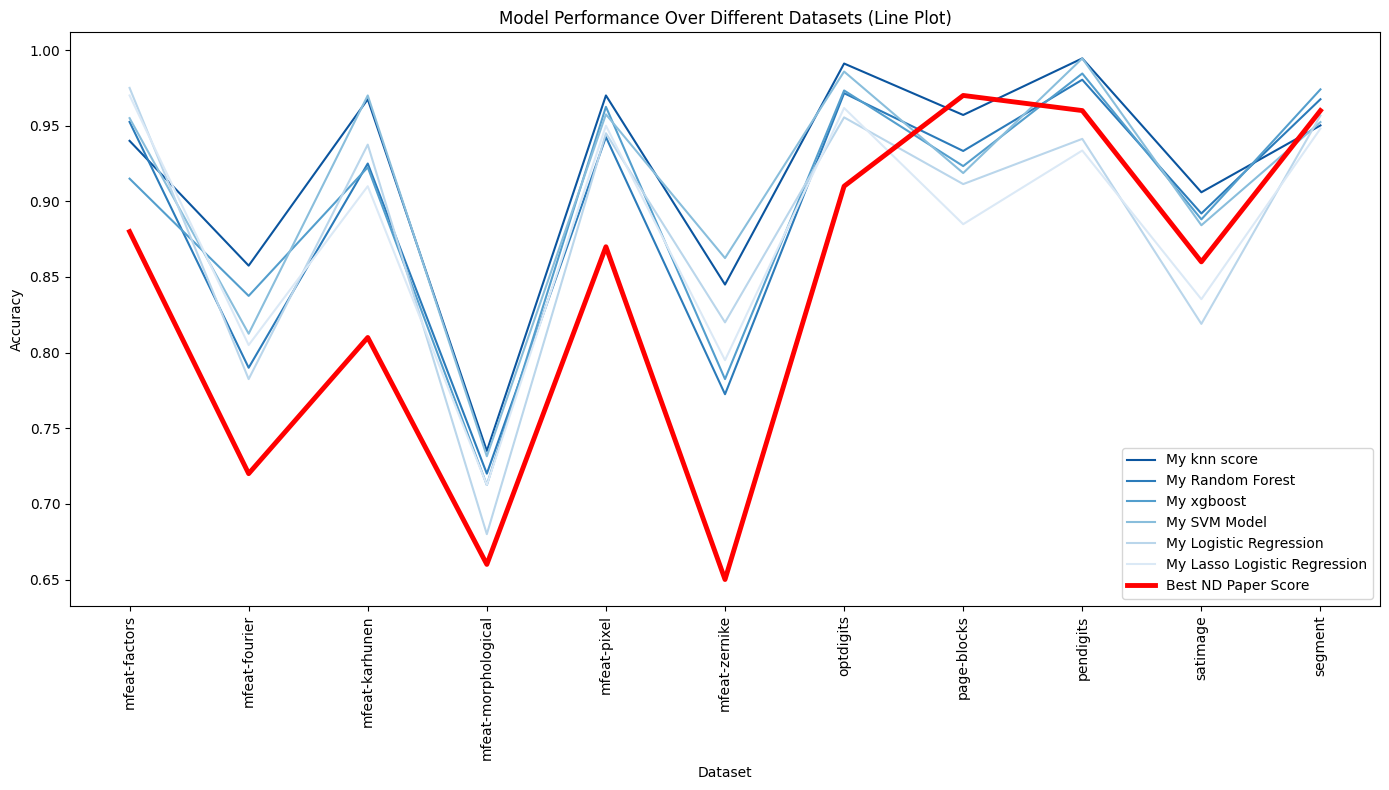

In [118]:
# comparison line graph
highlight_model = "Best ND Paper Score"
plt.figure(figsize=(14, 8))
sns.lineplot(x="Dataset", y="Accuracy", hue="Model", data=pd.melt(df.drop(highlight_model, axis=1), ['Name']).rename({'Name':'Dataset','variable':'Model', 'value':'Accuracy'}, axis=1))
sns.lineplot(x="Name", y=highlight_model, data=df, color='red', linewidth=3.5, label=highlight_model)

plt.title("Model Performance Over Different Datasets (Line Plot)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Comparison of base models to ND counterpart
# df = df.merge(df_mine, how="inner", on="Name")
svm_models = [
    'Name',
    'SVM OVR',
    'SVM OVO',
    'My SVM Model'
]
df_svm = df[svm_models]

In [ ]:
df_svm

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x="Name", y="value", hue="variable", data=pd.melt(df_svm, ['Name']))
plt.title("Model Performance Over Different Datasets (Line Plot)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

rankings = df_svm[svm_models].rank(axis=1, ascending=True)

# Calculating the average rank for each model
average_ranking = rankings.mean().sort_values()
# inverse_ranking = 9 - average_ranking  # Subtract from 9 to reverse the ranking

# Plotting the average rank of each model
plt.figure(figsize=(10, 6))
# plt.gca().invert_xaxis()
sns.barplot(x=average_ranking.values, y=average_ranking.index, palette="rocket")
plt.title("Average Rank of Each Model Across Datasets")
plt.xlabel("Average Rank (higher is better)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Confusion Matrix 

Find the confusion matrix of a few models and compare to see if they're very different


In [120]:
# beans data
file_name = "beans_datasets"
config = Config("beans_datasets")
df = fetch_ucirepo(id=602)
filename = "beans_data"
model_types = ['LogisticRegression']
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
df
# transform_label = mf.map_categorical_target(config, df)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Y
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [95]:
# pen based digits
config = Config("testing_datasets")
pen_based_recognition_of_handwritten_digits = fetch_ucirepo(id=81) 
filename = "pen_based_classifier"
model_types = ['LogisticRegression']
df = pen_based_recognition_of_handwritten_digits.data.original
# print(df['Class'])
# ecoli_data = ecoli_data.head(1000)
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/handwritten_digits.csv")
df
# df = df.head(1000)
# df['Y'], unique_strings = pd.factorize(df['class'])
# ecoli_data['Sequence_numerical'], unique_seq_strings = pd.factorize(ecoli_data['Sequence'])
# df.drop(['class', 'Sequence'], axis=1, inplace=True)
# ecoli_data['Y'] = ecoli_data['encoded_Y']
# print(df)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Y
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [ ]:
# letter recognition
config = Config("letter_rec")
letter_recognition = fetch_ucirepo(id=59) 
letter_recognition_data = letter_recognition.data.original
filename = "letter_recognition"
# model_types = ['randomForest', 'LogisticRegression', 'xgboost']
model_types = ['LogisticRegression']
transform_label = LabelEncoder()
# letter_recognition_data['lettr'] = transform_label.fit_transform(letter_recognition_data['lettr'])
df = letter_recognition_data
df.rename({'lettr': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/letter_recognition.csv")
# ecoli_data = abalone.data.original
# df.to_csv("data/letter_recognition.csv")
df

In [ ]:
# statlog
statlog_shuttle = fetch_ucirepo(id=148) 
df = statlog_shuttle.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/statlog_data.csv")

In [ ]:
# Room Occupany
df = fetch_ucirepo(id=864) 
df = df.data.original
df.rename({'Room_Occupancy_Count': 'Y'}, axis=1, inplace=True)
# df
df = mf.one_hot_encode(df, "Date")
df = mf.one_hot_encode(df, "Time")
# df.to_csv("data/room_occupancy_data.csv")
df

In [ ]:
# Yeast data
config = Config("yeast")
filename = "yeast"
yeast = fetch_ucirepo(id=110) 
df = yeast.data.original
# transform_label = LabelEncoder()
df.drop('Sequence_Name', axis=1, inplace=True)
df.rename({'localization_site': 'Y'}, axis=1, inplace=True)
# pre_transform_categories = tuple(df['Y'].unique())
# df['Y'] = transform_label.fit_transform(df['Y'])
# mapped_categories = dict(zip(pre_transform_categories, transform_label.transform(pre_transform_categories)))
# config.log.info(f"mapped categories: {mapped_categories}")
# df = mf.one_hot_encode(df, "Sequence_Name")
# df.to_csv("data/yeast.csv")
df

In [ ]:
# vowel data
config = Config("beans_datasets")
df = fetch_ucirepo(id=602)
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
df

In [58]:
# satimage
df = fetch_ucirepo(id=146)
df = df.data.original
config =  Config("satimage")
filename = 'satimage'
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/beans_data.csv")
# df.to_csv("data/satimage.csv")

In [ ]:
# glass data
config = Config("glass_datasets")
filename = "glass_datasets"
df = fetch_ucirepo(id=42)
df = df.data.original
df.drop('Id_number', axis=1, inplace=True)
df.rename({'Type_of_glass': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/glass_data.csv")
df

In [ ]:
letter_recognition = fetch_ucirepo(id=59) 
letter_recognition_data = letter_recognition.data.original

In [ ]:
# Abalone
config = Config("testing_datasets")
filename = "abalone_classifier"
abalone = pd.read_csv("data/abalone.csv")
abalone.rename({'Rings': 'Y'}, axis=1, inplace=True)
df = mf.one_hot_encode(abalone, "Sex")
print(df)

In [209]:
# Image segmentation
df = fetch_ucirepo(id=147) 
df = df.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/image_segment.csv")

In [ ]:
# Covertype data
df = fetch_ucirepo(id=31) 
df = df.data.original
df.rename({'Cover_Type': 'Y'}, axis=1, inplace=True)
df.to_csv("data/cover_type.csv")

In [103]:
# Car evaluation data
df = fetch_ucirepo(id=19) 
df = df.data.original
df = mf.one_hot_encode(df, "buying")
df = mf.one_hot_encode(df, "maint")
df = mf.one_hot_encode(df, "doors")
df = mf.one_hot_encode(df, "persons")
df = mf.one_hot_encode(df, "lug_boot")
df = mf.one_hot_encode(df, "safety")
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/car_evaluation.csv")

In [31]:
# pageblocks data
df = fetch_ucirepo(id=78) 
df = df.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
filename = 'pageblocks'
# df.to_csv("data/pageblocks.csv") 

In [91]:
# optdigits data
df = fetch_ucirepo(id=80) 
df = df.data.original
df.rename({'class': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/optdigits.csv")

In [ ]:
# Bike sharing data
df = fetch_ucirepo(id=275) 
df = df.data.original
df.rename({'cnt': 'Y'}, axis=1, inplace=True)
# df.to_csv("data/bike_sharing.csv")
df

In [ ]:
# mfeat-factors data
filename = "mfeat-factors" 
df = pd.read_csv("data/mfeat/mfeat-fac", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-factors.csv")

In [55]:
#mfeat-fourier data
filename = 'mfeat-fourier'
config = Config(filename)
df = pd.read_csv("data/mfeat/mfeat-fou", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-fouriers.csv")

In [ ]:
#mfeat-karhunen data
df = pd.read_csv("data/mfeat/mfeat-kar", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-karhunen.csv")

In [ ]:
#mfeat-pixel data
df = pd.read_csv("data/mfeat/mfeat-pix", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-pixel.csv")
df

In [173]:
#mfeat-morphological data
df = pd.read_csv("data/mfeat/mfeat-mor", delim_whitespace=True, header=None)
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-morphological.csv")

In [ ]:
#mfeat-zernlike data
df = pd.read_csv("data/mfeat/mfeat-zer", delim_whitespace=True, header=None)
filename = "mfeat-zernlike"
y_column = []
for i in range(10):
    y_column.extend([i] * 200)

# Add the 'Y' column to the DataFrame
df['Y'] = y_column
# df.to_csv("data/mfeat-zernlike.csv")

In [ ]:
# zoo data
df = fetch_ucirepo(id=111) 
df = df.data.original
df.rename({'type': 'Y'}, axis=1, inplace=True)
filename = 'zoo'
# df.fillna(-1)
df.drop('animal_name', axis=1, inplace=True)
# df.to_csv("data/zoo.csv")

In [ ]:
grouped_df = df.groupby('Y').size().reset_index(name='counts') 
# df = df.loc[(df['Y'] > 4) & (df['Y'] < 17)]
# grouped_df = df.groupby('Y').size().reset_index(name='counts')
grouped_df

In [ ]:
df.to_csv("data/abalone_culled.csv")

In [ ]:
# wine quality dataset
df = fetch_ucirepo(id=186) 
df = df.data.original
df.rename({'quality': 'Y'}, axis=1, inplace=True)
df = mf.one_hot_encode(df, "color")
df.to_csv("data/wine_quality_data.csv")
filename = "wine_quality"

In [ ]:
# breast cancer
df = fetch_ucirepo(id=14)
df = df.data.original
df.rename({'Class': 'Y'}, axis=1, inplace=True)
df

In [ ]:
filename

--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 407, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\maxdi\\OneDrive\\Documents\\uni_honours\\logs\\pageblocks_confusion_matrix_2024-09-29.log' -> 'c:\\Users\\maxdi\\OneDrive\\Documents\\uni_honours\\logs\\pageblocks_confusion_matrix_2024-09-29.log.2024-09-29'
Call stack:
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\maxdi\A

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.88      0.92        40
           2       0.71      0.80      0.75        40
           3       0.62      0.45      0.52        40
           4       0.57      0.85      0.68        40
           5       0.81      0.62      0.70        40
           6       0.48      0.62      0.54        40
           7       0.82      0.82      0.82        40
           8       1.00      1.00      1.00        40
           9       0.44      0.30      0.36        40

    accuracy                           0.73       400
   macro avg       0.74      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 407, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\maxdi\\OneDrive\\Documents\\uni_honours\\logs\\pageblocks_confusion_matrix_2024-09-29.log' -> 'c:\\Users\\maxdi\\OneDrive\\Documents\\uni_honours\\logs\\pageblocks_confusion_matrix_2024-09-29.log.2024-09-29'
Call stack:
  File "c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\maxdi\A

<Figure size 640x360 with 0 Axes>

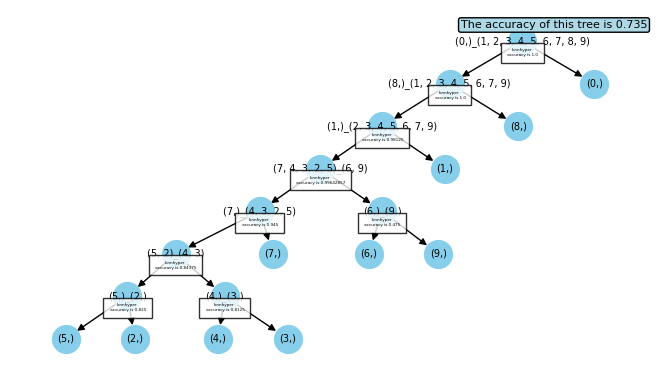

In [174]:
# Run my model
# filename = "Zernlike"
# config = Config(f"{filename}_confusion_matrix")
# model_strucs = [((3,), (2, 0, 1)), ((2, 0), (1,)), ((2,), (0,))]
# tree_types = ['svm', 'svm', 'svm']

#mfeat-zernlike
# model_strucs = [((0, 8), (1, 2, 3, 4, 5, 6, 7, 9)), ((0,), (8,)), ((7,), (1, 2, 3, 4, 5, 6, 9)), ((4, 1), (2, 3, 5, 6, 9)), ((4,), (1,)), ((2,), (3, 5, 6, 9)), ((5, 3), (6, 9)), ((5,), (3,)), ((6,), (9,))]
# tree_types = ['svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm']

# morphological
# model_strucs = [((0,),(1,2,3,4,5,6,7,8,9)), 
#     ((8,),(1,2,3,4,5,6,7,9)), 
#     ((2,),(1,3,4,5,6,7,9)),
#     ((6,9),(1,3,4,5,7)),
#     ((6,),(9,)),
#     ((5,),(4,7,1,3)),
#     ((3,),(1,4,7)),
#     ((1,),(4,7)),
#     ((4,),(7,))
# ]


# model_strucs = [((0,), (1, 2, 3, 4, 5, 6, 7, 8, 9)), ((8,), (1, 2, 3, 4, 5, 6, 7, 9)), ((1,), (2, 3, 4, 5, 6, 7, 9)), ((2, 5), (3, 4, 6, 7, 9)), ((2,), (5,)), ((4, 3, 7), (6, 9)), ((7,), (3, 4)), ((3,), (4,)), ((6,), (9,))]
# tree_types = ['svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm', 'svm']

# model_strucs = [
#     ((8,),(0,1,2,3,4,5,6,7,8,9)), 
#     ((0,),(1,2,3,4,5,6,7,9)), 
#     ((1,),(2,3,4,5,6,7,9)),
#     ((6,9),(2,3,4,5,7)),
#     ((6,),(9,)),
#     ((7,),(4,5,2,3)),
#     ((3,),(2,5)),
#     ((5,),(2,))
# ]
# tree_types = ['knnhyper', 'knnhyper', 'knnhyper', 'knnhyper', 'knnhyper', 'knnhyper', 'knnhyper', 'knnhyper', 'knnhyper']

# model_strucs = [((2,), (0, 1, 3, 4, 5, 6, 7, 8, 9)), ((6,), (0, 1, 3, 4, 5, 7, 8, 9)), ((4,), (0, 1, 3, 5, 7, 8, 9)), ((7, 9, 1, 3, 5), (0, 8)), ((7,), (9, 1, 3, 5)), ((1,), (9, 3, 5)), ((9,), (3, 5)), ((3,), (5,)), ((0,), (8,))]
model_strucs = [((4,), (1, 2, 5, 3)), ((3,), (1, 2, 5)), ((2,), (1, 5)), ((1,), (5,))] 

model_strucs = [((1,), (3, 4, 5, 7, 2)), ((2,), (3, 4, 5, 7)), ((5,), (3, 4, 7)), ((3,), (7, 4)), ((7,), (4,))]
model_strucs = [((1,), (3, 4, 5, 7, 2)), ((2,), (3, 4, 5, 7)), ((5,), (3, 4, 7)), ((3,), (7, 4)), ((7,), (4,))]
model_strucs = [((0,), (1, 2, 3, 4, 5, 6, 7, 8, 9)), ((8,), (1, 2, 3, 4, 5, 6, 7, 9)), ((1,), (2, 3, 4, 5, 6, 7, 9)), ((7, 4, 3, 2, 5), (6, 9)), ((7,), (4, 3, 2, 5)), ((5, 2), (4, 3)), ((5,), (2,)), ((4,), (3,)), ((6,), (9,))]
model_strucs = [((6,), (3, 2, 7, 1, 4, 5)), ((2,), (3, 7, 1, 4, 5)), ((7,), (3, 1, 4, 5)), ((1,), (3, 4, 5)), ((5,), (3, 4)), ((3,), (4,))]
model_types = 'knnhyper'

filename = 'image_segment'
config = Config(f"{filename}_{model_types}_confusion_matrix2")

# model_strucs = [((2,), (3, 4, 5, 7, 1)), ((1,), (3, 4, 5, 7)), ((5,), (3, 4, 7)), ((3,), (4, 7)), ((4,), (7,))]
# model_strucs = [((1,), (2,)), ((1, 2), (3,)), ((1, 2, 3), (4,))]
tree_types = [model_types] * len(model_strucs)
transform_label = mf.map_categorical_target(config, df)
X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], stratify=df['Y'], test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], test_size=0.2, random_state=42)
score_type = 'accuracy'
categories = tuple(df['Y'].unique())
best_trained_model, y_test_stuff, y_predicted_stuff = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label)
mf.graph_model(config, best_trained_model, filename, transform_label, [model_types])


# [((3,), (2, 0, 1)), ((2, 0), (1,)), ((2,), (0,))]
# ['svm', 'svm', 'svm']
# config = Config(filename)
# model_types = ['randomForest', 'LogisticRegression','xgboost']
# model_types = ['knnhyper']
# model_types = ['svm']

# X_train, X_test, y_train, y_test = train_test_split(df, df['Y'], stratify=df['Y'], test_size=0.2, random_state=42)
# score_type = 'accuracy'
# categories = tuple(df['Y'].unique())

# config.log.info('Beginning of stepwise tree finder.')
# best_tree = mf.stepwise_tree_finder(config, categories, X_train, [], {}, model_types=model_types, score_type=score_type)
# # categories = tuple((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))
# # categories = tuple(df['Y'].unique())
# model_strucs = list(best_tree.keys())
# tree_types = list(best_tree.values())
# print(model_strucs)
# print(tree_types)
# best_trained_model, y_test_stuff, y_predicted_stuff = mf.build_best_tree(config, X_test, X_train, y_test, score_type, tree_types, model_strucs, categories, transform_label = transform_label)
# mf.graph_model(config, best_trained_model, filename, transform_label, model_types)

In [142]:
# Run with multinomial logisitc regression
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=Y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=4000)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=4000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.90011
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       265
           1       1.00      0.99      1.00       104
           2       0.91      0.94      0.93       326
           3       0.90      0.89      0.90       709
           4       0.94      0.94      0.94       386
           5       0.92      0.94      0.93       406
           6       0.81      0.85      0.83       527

    accuracy                           0.90      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Run with LDA
transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def two_confusion_matrix(cm1,cm2, filename="", nd_model_type="", competitor_model_name = "", labels=None):
    # Create subplots to display the two confusion matrices side by side
    if labels is not None:
        cm1 = pd.DataFrame(cm1, index=labels, columns=labels)
        cm2 = pd.DataFrame(cm2, index=labels, columns=labels)
        try:
            col1 = cm1.columns.tolist()
            col1.sort()
            cm1 = cm1[col1]
            cm1 = cm1.sort_index()

            col2 = cm1.columns.tolist()
            col2.sort()
            cm2 = cm2[col2]
            cm2 = cm2.sort_index()
        except Exception as e:
            print(e)
    nd_model_name = f"ND {nd_model_type} Confusion Matrix"
    competitor_model_name = f"{competitor_model_name} Confusion Matrix"
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{filename.capitalize()} Dataset Confusion Matrix Comparison', fontsize=16)
    vmin = min(cm1.values.min(), cm2.values.min())
    vmax = max(cm1.values.max(), cm2.values.max())

    # First confusion matrix
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0], vmin=vmin, vmax=vmax)
    axes[0].set_title(nd_model_name)
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Second confusion matrix
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1], vmin=vmin, vmax=vmax)
    axes[1].set_title(competitor_model_name)
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    # Display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
# Run with LDA
transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

In [ ]:
# Run with xgboost OVR
from sklearn.model_selection import cross_val_score

transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = xgb.XGBClassifier(n_jobs = -1, objective="binary:logistic")
model = OneVsOneClassifier(model)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(model, df_x, Y, cv=cv, scoring='accuracy')


model.fit(X_train, y_train)

# # Make predictions on the test set
y_pred = model.predict(X_test)

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [36]:
# Run with SVM OVO
from sklearn.model_selection import cross_val_score

transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = xgb.XGBClassifier(n_jobs = -1, objective="binary:logistic")
model = OneVsOneClassifier(model)
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(model, df_x, Y, cv=cv, scoring='accuracy')

model.fit(X_train, y_train)

# # Make predictions on the test set
y_pred = model.predict(X_test)

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [37]:
# Run with SVM OVO
from sklearn.multiclass import OneVsOneClassifier
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=43)
model = make_pipeline(StandardScaler(), svm.SVC())
model = OneVsOneClassifier(model)
# model = svm.SVC(decision_function_shape='ovo')
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.96438
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       983
           2       0.92      0.91      0.92        66
           3       0.00      0.00      0.00         5
           4       0.80      0.67      0.73        18
           5       0.85      0.48      0.61        23

    accuracy                           0.96      1095
   macro avg       0.71      0.61      0.65      1095
weighted avg       0.96      0.96      0.96      1095



c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\maxdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [212]:
# Run with knn

Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=41)

param_grid = {'n_neighbors': range(1, 31)}

# Set up GridSearchCV
scaler = StandardScaler()
knn = KNeighborsClassifier()
# model = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
model = make_pipeline(
    # StandardScaler(),
    KNeighborsClassifier()
)

param_grid = {
    'kneighborsclassifier__n_neighbors': range(1, 31) 
}

model = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# model=knn
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(model, df_x, Y, cv=cv, scoring='accuracy')
# accuracy = scores.mean()

# print(scores)

model.fit(X_train, y_train)
# print(model)

# Make predictions on the test set
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')

Accuracy: 0.9718614719


In [ ]:
# Run with LDA
transform_label = mf.map_categorical_target(config, df)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

In [83]:
# Run with random forest
# df.drop(df.columns[0], axis=1, inplace=True)
Y = df['Y']
df_x = df.drop('Y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, Y, stratify=df['Y'], test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators = 100)
# model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.10f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9121989122
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       307
           2       0.99      0.96      0.98       141
           3       0.88      0.97      0.92       272
           4       0.77      0.58      0.66       125
           5       0.94      0.89      0.91       141
           7       0.89      0.91      0.90       301

    accuracy                           0.91      1287
   macro avg       0.91      0.88      0.89      1287
weighted avg       0.91      0.91      0.91      1287



In [139]:
transform_label.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [183]:
filename = " ".join(filename.split("_"))
nd_model_type="KNN"
competitor_model_name = "KNN"
labels = df['Y'].unique()
cm1 = confusion_matrix(y_test_stuff, y_predicted_stuff, labels = transform_label.classes_)
cm2 = confusion_matrix(y_test, y_pred, labels = transform_label.classes_)
cm2 = confusion_matrix(transform_label.inverse_transform(y_test), transform_label.inverse_transform(y_pred), labels = transform_label.classes_)
two_confusion_matrix(cm1, cm2, filename, nd_model_type, competitor_model_name, labels=transform_label.classes_)

AttributeError: 'NoneType' object has no attribute 'classes_'

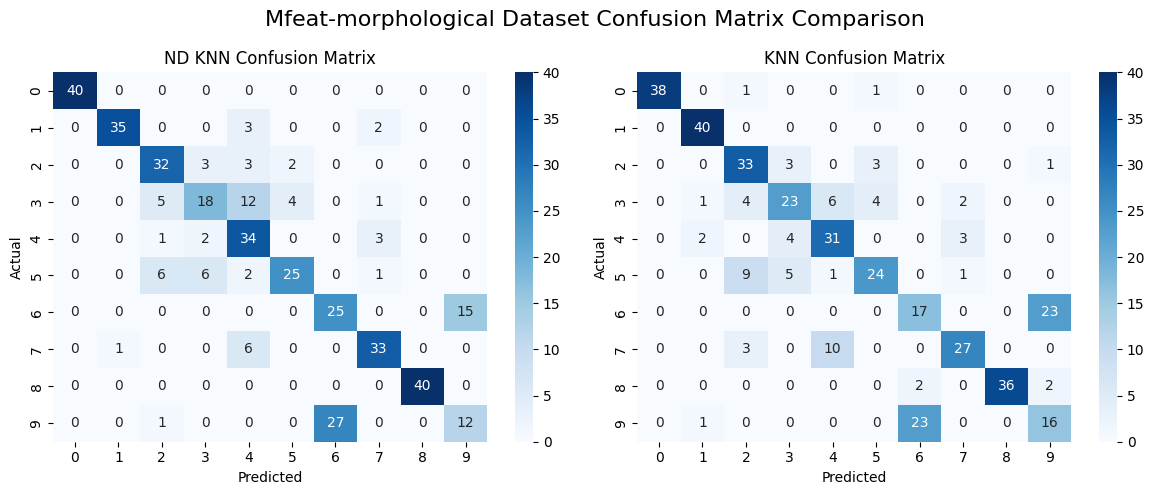

In [187]:
filename = " ".join(filename.split("_"))
nd_model_type="KNN"
competitor_model_name = "KNN"
labels = df['Y'].unique()
cm1 = confusion_matrix(y_test_stuff, y_predicted_stuff)
cm2 = confusion_matrix(y_test, y_pred)
# cm2 = confusion_matrix(transform_label.inverse_transform(y_test), transform_label.inverse_transform(y_pred), labels = transform_label.classes_)
two_confusion_matrix(cm1, cm2, filename, nd_model_type, competitor_model_name, labels=labels)

In [189]:
model.best_params_

{'kneighborsclassifier__n_neighbors': 17}

In [201]:
thing = [(i.name, i.fitted_model.best_params_) for i in best_trained_model.models]

In [202]:
thing

[('(0,)_(1, 2, 3, 4, 5, 6, 7, 8, 9)',
  {'kneighborsclassifier__n_neighbors': 1}),
 ('(8,)_(1, 2, 3, 4, 5, 6, 7, 9)', {'kneighborsclassifier__n_neighbors': 1}),
 ('(1,)_(2, 3, 4, 5, 6, 7, 9)', {'kneighborsclassifier__n_neighbors': 29}),
 ('(7, 4, 3, 2, 5)_(6, 9)', {'kneighborsclassifier__n_neighbors': 4}),
 ('(7,)_(4, 3, 2, 5)', {'kneighborsclassifier__n_neighbors': 9}),
 ('(5, 2)_(4, 3)', {'kneighborsclassifier__n_neighbors': 13}),
 ('(5,)_(2,)', {'kneighborsclassifier__n_neighbors': 12}),
 ('(4,)_(3,)', {'kneighborsclassifier__n_neighbors': 12}),
 ('(6,)_(9,)', {'kneighborsclassifier__n_neighbors': 14})]

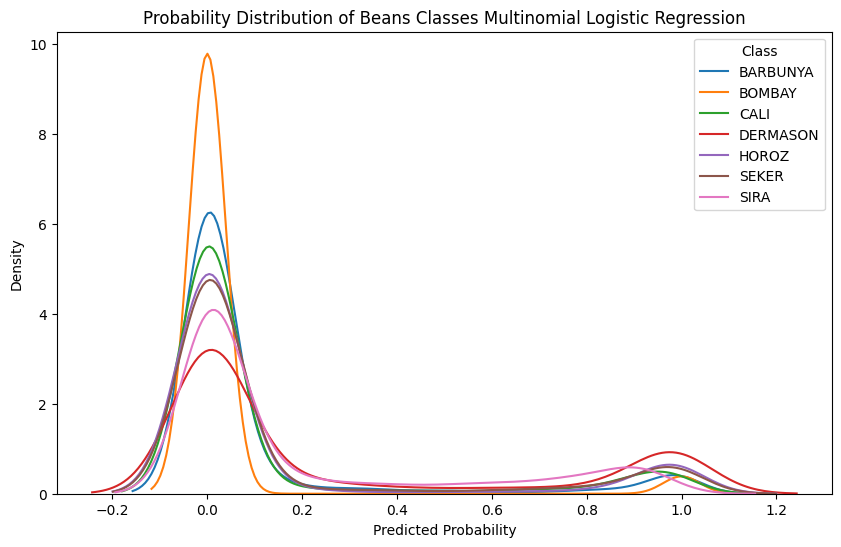

In [150]:
# Get predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Convert the predicted probabilities to a DataFrame for easier plotting
# Assuming model has n classes
n_classes = len(model.classes_)
prob_df = pd.DataFrame(y_prob, columns=[f'Class {i}' for i in range(n_classes)])

# Plot the probability distributions for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    sns.kdeplot(prob_df[f'Class {i}'], fill=False, label=f'{transform_label.inverse_transform([i])[0]}')

plt.title('Probability Distribution of Beans Classes Multinomial Logistic Regression')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend(title='Class')
plt.show()

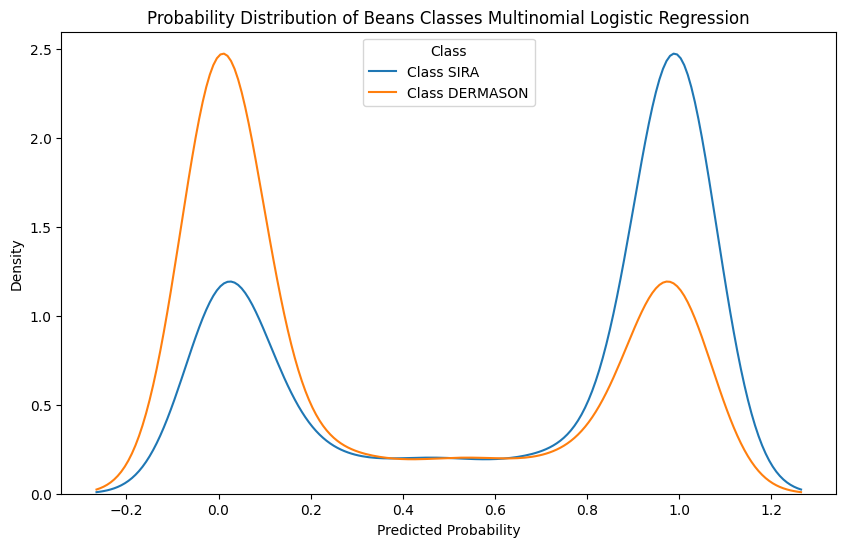

In [170]:
# Get predicted probabilities for each class
my_mod = [i for i in best_trained_model.models if i.name == "['SIRA']_['DERMASON']"][0].fitted_model
y_prob = my_mod.predict_proba(X_test)

my_dict = {
    0:'SIRA',
    1:'DERMASON'
}
# Convert the predicted probabilities to a DataFrame for easier plotting
# Assuming model has n classes
n_classes = len(my_mod.classes_)
prob_df = pd.DataFrame(y_prob, columns=[f'Class {i}' for i in range(n_classes)])

# Plot the probability distributions for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    sns.kdeplot(prob_df[f'Class {i}'], fill=False, label=f'Class {my_dict[i]}')

plt.title('Probability Distribution of Beans Classes Multinomial Logistic Regression')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend(title='Class')
plt.show()

In [160]:
[i for i in best_trained_model.models if i.name == "['SIRA']_['DERMASON']"][0].fitted_model.predict_proba()

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel', SelectFromModel(estimator=LassoCV(cv=3))),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=2000))])

In [168]:
[i for i in best_trained_model.models if i.name == "['SIRA']_['DERMASON']"][0].type_0_categories_name

array(['SIRA'], dtype=object)

In [149]:
transform_label.inverse_transform([1])[0]

'BOMBAY'

In [74]:
cols = cm1.columns.tolist()
cols.sort()

In [151]:
y_prob

array([[1.17174405e-04, 1.98494610e-23, 2.50853973e-05, ...,
        1.36908007e-04, 3.73012737e-02, 1.29284776e-01],
       [2.21684652e-34, 1.00000000e+00, 3.78712935e-31, ...,
        1.44065738e-65, 2.51188240e-57, 2.92101717e-62],
       [5.96333251e-03, 6.83510612e-21, 3.48964819e-03, ...,
        5.38902439e-03, 2.78932286e-02, 9.37053800e-01],
       ...,
       [2.52847420e-04, 1.99811892e-20, 1.79374910e-02, ...,
        9.63827686e-01, 4.18206177e-09, 1.79819642e-02],
       [2.27450169e-02, 6.78955222e-15, 9.69644502e-01, ...,
        6.76354105e-03, 6.19669543e-09, 8.46933948e-04],
       [4.86570896e-05, 1.48345747e-23, 1.15361141e-05, ...,
        5.12734934e-05, 3.52280440e-02, 7.32986973e-02]])

In [82]:
print(df.groupby('Y')['Y'].count())

Y
acc       384
good       69
unacc    1210
vgood      65
Name: Y, dtype: int64


C:\Users\maxdi\AppData\Local\Temp\ipykernel_3400\1773745588.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Y', data=df, palette='flare')


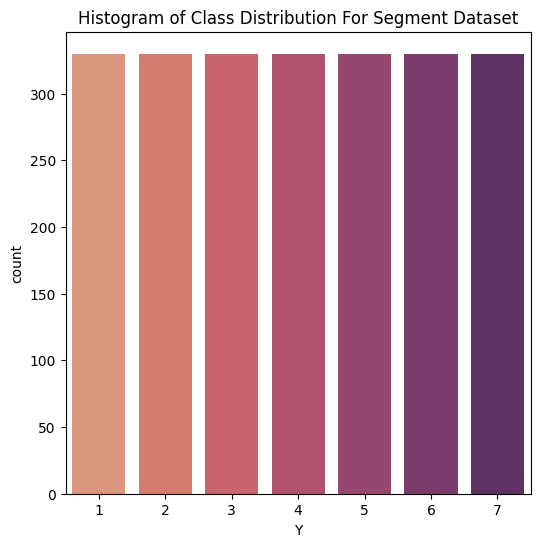

In [108]:
# Pie chart using seaborn with muted blue 

title = f"Histogram of Class Distribution For Segment Dataset"
class_counts = df['Y'].value_counts().sort_index(ascending=True)
plt.figure(figsize=(6, 6))
sns.set_palette("Blues_r")  # Setting seaborn palette to muted blue colors
class_percentages = class_counts / class_counts.sum()
# colours = sns.color_palette("Blues_r", class_percentages)
colours = plt.cm.Blues(class_percentages)
# plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=colours)
sns.countplot(x='Y', data=df, palette='flare')
plt.title(title)
plt.show()


# Decision Tree analysis 

Trying to understand why decision tree is performing badly

In [106]:
for i in best_trained_model.models:
    print(i.name)

chosen_model = [i for i in best_trained_model.models if i.name == '(7,)_(4,)']

(1,)_(3, 4, 5, 7, 2)
(2,)_(3, 4, 5, 7)
(5,)_(3, 4, 7)
(3,)_(7, 4)
(7,)_(4,)


In [107]:
my_mod=chosen_model[0].fitted_model

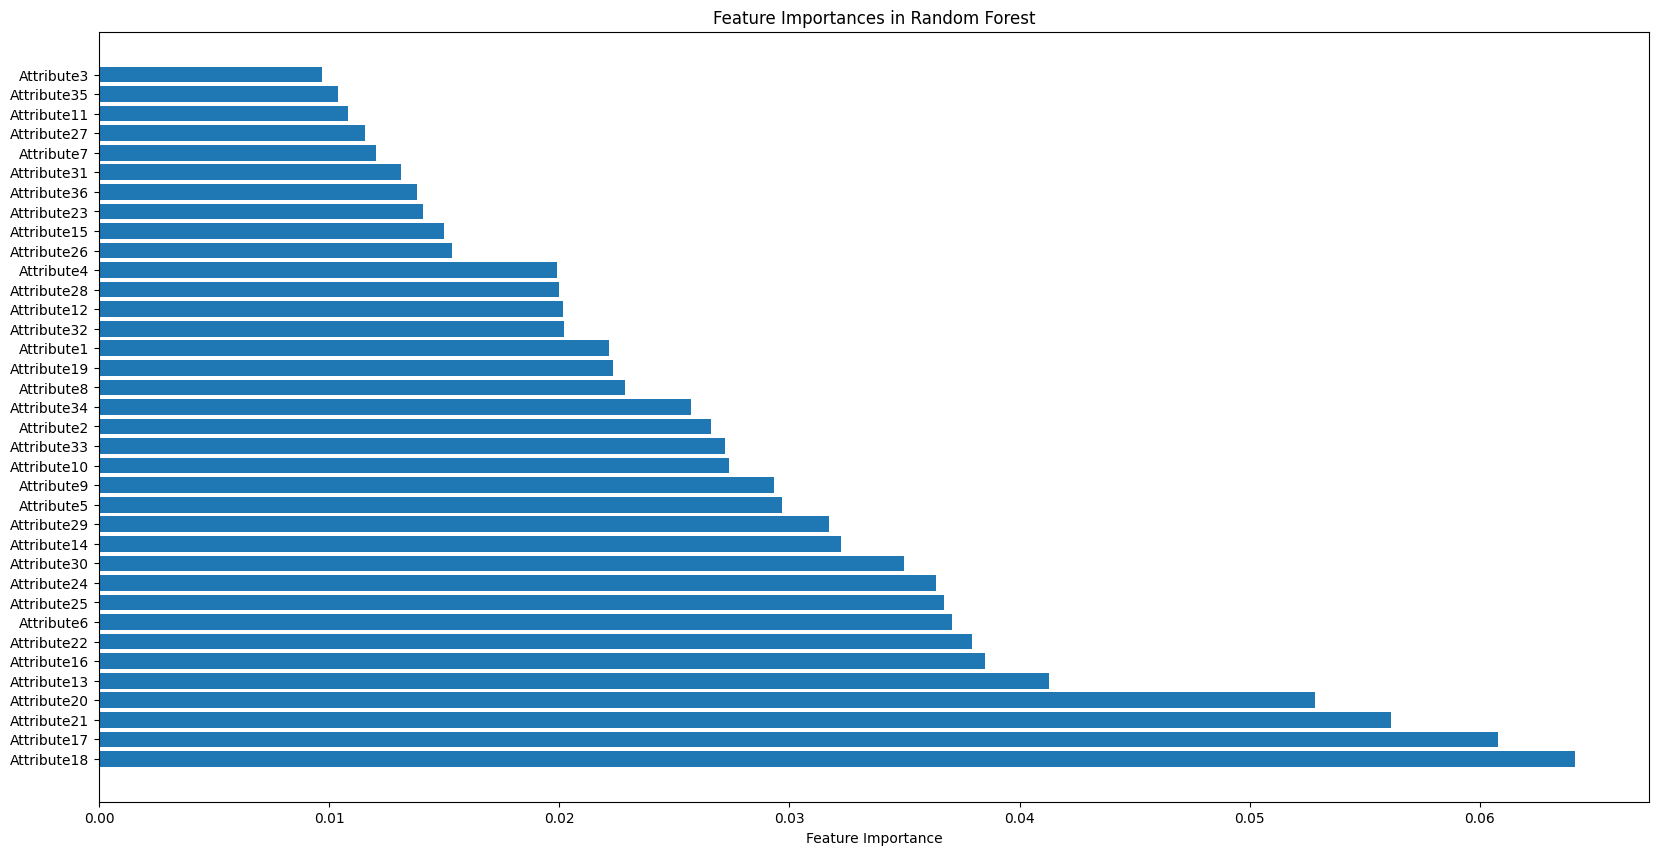

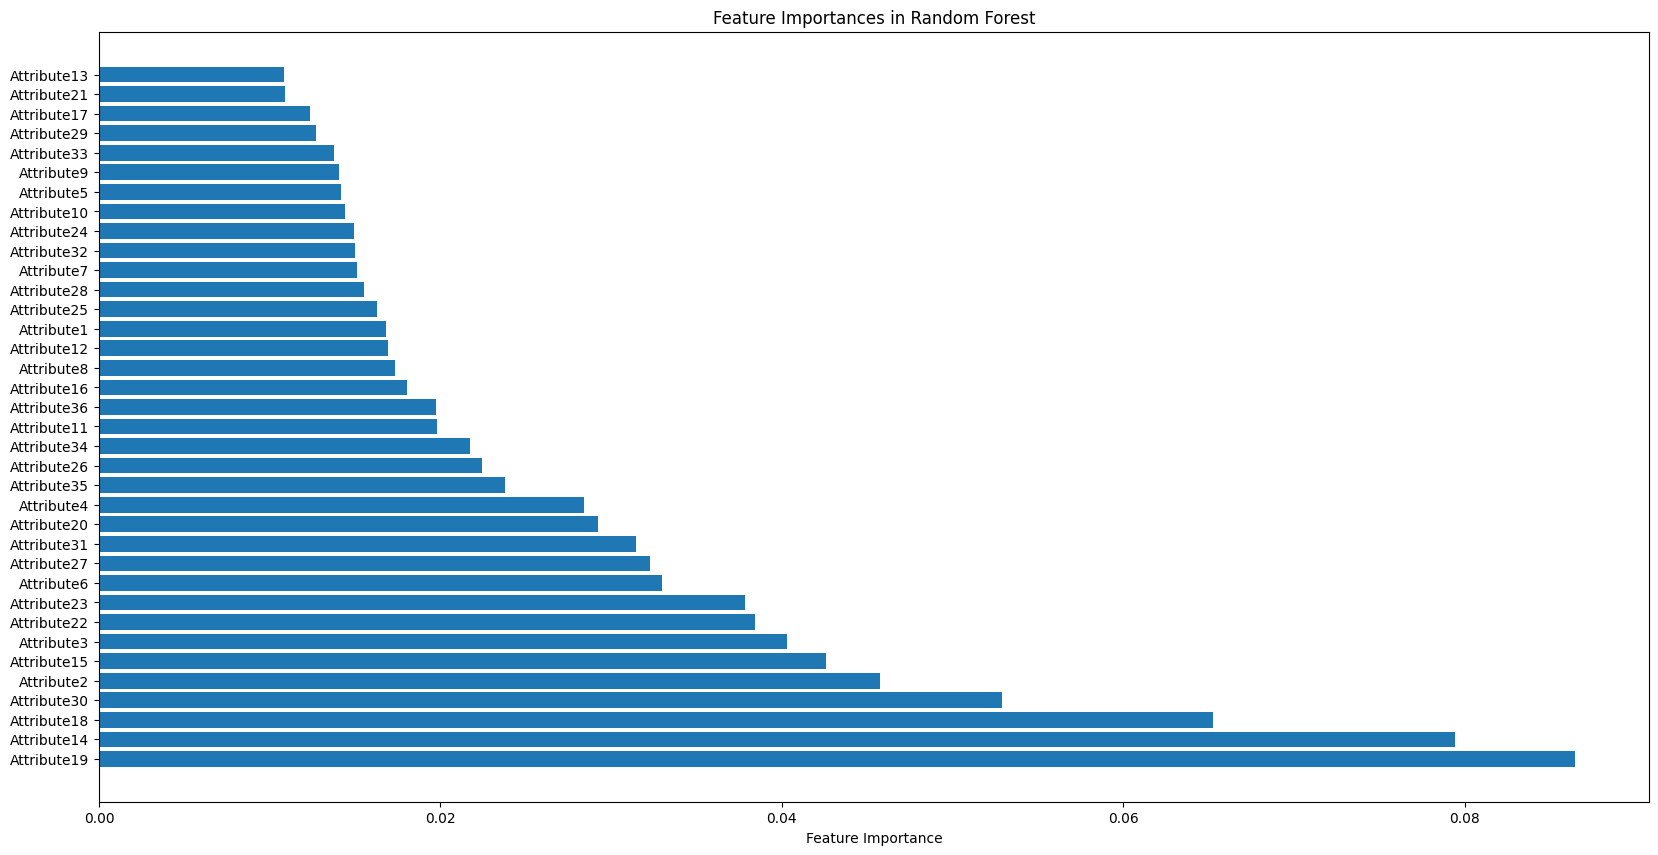

In [111]:
# Assuming your Random Forest model is named `rf_model`
feature_importances = model.feature_importances_
features = X_train.columns  # assuming you have the feature names from your training data

# Plotting feature importance
plt.figure(figsize=(20,10))
# plt.subplot(1, 2, 1)
indices = np.argsort(feature_importances)[::-1]
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Default Random Forest')
plt.show()

my_feature_importance = my_mod.feature_importances_
# Plotting feature importance
plt.figure(figsize=(20,10))
# plt.subplot(1, 2, 1)
indices = np.argsort(my_feature_importance)[::-1]
plt.barh(range(len(indices)), my_feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances in ND Random Forest')
plt.show()

In [85]:
from sklearn.tree import export_text

# Get one of the trees from the RandomForest
tree = model.estimators_[0]

# Print the decision rules of the tree
tree_rules = export_text(tree, feature_names=list(features))
print(tree_rules)


|--- Attribute20 <= 75.50
|   |--- Attribute17 <= 61.50
|   |   |--- Attribute2 <= 65.00
|   |   |   |--- Attribute5 <= 61.50
|   |   |   |   |--- Attribute18 <= 62.50
|   |   |   |   |   |--- Attribute32 <= 114.50
|   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- Attribute32 >  114.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Attribute18 >  62.50
|   |   |   |   |   |--- Attribute29 <= 55.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Attribute29 >  55.50
|   |   |   |   |   |   |--- Attribute25 <= 65.50
|   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |--- Attribute25 >  65.50
|   |   |   |   |   |   |   |--- Attribute26 <= 80.50
|   |   |   |   |   |   |   |   |--- class: 5.0
|   |   |   |   |   |   |   |--- Attribute26 >  80.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- Attribute5 >  61.50
|   |   |   |   |--- Attribute9 <= 65.50
|   |   |   |   |   |--- Attribute23 <= 80.50
|   |   |   

In [90]:
model.classes_

array([1, 2, 3, 4, 5, 7], dtype=int64)

In [113]:
from sklearn.tree import export_graphviz
import graphviz

# Specify the two classes you want to focus on
focus_classes = [4, 7]  # Replace with actual class names or indices
class_names_filtered = [cls if cls in focus_classes else 'other' for cls in model.classes_]

# Export the tree to DOT format with filtered class names
tree = model.estimators_[0]  # First tree of the RandomForest

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=class_names_filtered,  
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=10)  

# Visualize the decision tree using graphviz
graph = graphviz.Source(dot_data)  
graph.render("filtered_decision_tree")  # Save the tree as a PDF
graph.view() 


'filtered_decision_tree.pdf'

In [156]:
for i in best_trained_model.models:
    print(i.name)


#  best_trained_model.models

['BOMBAY']_['SEKER' 'BARBUNYA' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']
['BARBUNYA' 'CALI']_['SEKER' 'HOROZ' 'SIRA' 'DERMASON']
['HOROZ']_['SEKER' 'SIRA' 'DERMASON']
['SEKER']_['SIRA' 'DERMASON']
['BARBUNYA']_['CALI']
['SIRA']_['DERMASON']
